# PROJECT 3-DATA 1

## Soufiane Fadel and Razieh Pourhasan

# Table of contents 

- <a href='#intro'>1. Introduction</a>  

- <a href='#pod'>2. preliminary process of Data</a>
     - <a href='#ll'>2.1 Load libraries</a>
     - <a href='#rrtd'>2.2 Read the Data</a>
     - <a href='#oot'>2.3 Overview of tables</a>
     - <a href='#dnc'>2.4  Dividing the data into numerical and categorical</a>
     - <a href='#sonv'>2.5. Statistics overview of numerical features</a>
     - <a href='#socv'>2.6. Statistics overview of categorical features</a>


- <a href='#dp'>3. Data preparation</a>
     - <a href='#cfmd'> 3.1 Check for missing data</a>
     - <a href='#decv'> 3.2 Dropping the encodded Categorical Features</a>


- <a href='#q1'>4. Question 1 </a>
     - <a href='#sod'>4.1 The source of the dataset </a>
     - <a href='#dd'>4.2 Data dictionary to explain variables</a>


- <a href='#q2'>5. Question 2 </a>
     - <a href='#loq'>5.1 List of questions about the datasets. </a>


- <a href='#q3'>6. Question 3 </a>
     - <a href='#udcov'>6.1 Univariate Distribution of continous variables </a>

     - <a href='#udcav'>6.2 Univariate Distribution of categorical variables <a>

               

- <a href='#q4'>7. Question 4 </a>
     - <a href='#pcbf'>7.1 pairwise correlation between features  </a> 
     - <a href='#lr'>7.2 Linear regression with marginal distributions for continous variables  </a>
     - <a href='#sm'>7.3 Scatterplot Matrix  </a>

  




- <a href='#q5'>8. Question 5 </a>

     - <a href='#dwtd'>8.1 Do you trust the dataset, or not? Support your answer. </a>  
     - <a href='#tie'>8.2 Flag potential invalid entries, anomalous observations, or outliers. How should these entries be treated? </a>
   




- <a href='#q6'>9. Question 6 </a>

     - <a href='#sosvt'>9.1 Does any of your analysis suggest that some of the variables should be transformed </a>
     

 

 




# <a id='intro'>1. Intoduction</a> 

In this project, we are going to clean and process the following three dataset.

* **data_1** : GlobalCitiesPBI.csv

# <a id='pod'>2. preliminary process of Data</a>  

### <a id='ll'>2.1 Load libraries</a>
We import pandas to work with our data, Matplotlib to plot charts, and Seaborn to make our charts prettier.

In [96]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import scipy.stats as ss
color = sns.color_palette()
sns.set(style="darkgrid")
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from collections import Counter
from dython._private import convert, remove_incomplete_samples, replace_nan_with_value


### <a id='rrtd'>2.2 Read the Data</a>

Let's load the GlobalCitiesPBI.csv which has been provided in datasets for the course.


In [97]:
rawdf = pd.read_csv('GlobalCitiesPBI.csv')
rawdf.head()

,Geography,Continent,Country,City.Area..km2.,Metro.Area..km2.,City.Population..millions.,Metro.Population..millions.,Annual.Population.Growth,GDP.Per.Capita..thousands....PPP.rates..per.resident.,Primary.Industry,...,Number.of.Museums,Air.Quality.,Laws.or.Regulations.to.Improve.Energy.Efficiency,rating,gen.rating,Life.Expectancy,Laws.or.Regulations.to.Improve.Energy.Efficiency.Flag,Anti.Smoking.Legislation.Flag,Sort_gen.rating,Sort_rating
0,Amsterdam,Europe,The Netherlands,165.00,807.00,0.76,1.40,0.01,46.0,Research and Advising,...,68,24,Yes,Alpha-,Alpha,79,1,1,1,4
1,Ankara,Europe,Turkey,30.72,25437.00,3.54,4.77,0.26,21.2,Wholesale and Retail Trade,...,36,46,No,Gamma,Gamma,78,0,1,3,9
2,Athens,Europe,Greece,38.91,380.69,0.66,4.01,0.00,30.5,Finance & Corporate Services,...,47,41,Yes,Beta+,Beta,81,1,1,2,5
3,Bangkok,Asia,Thailand,1569.00,7762.00,5.72,6.50,0.03,23.4,Agriculture,...,27,54,Yes,Alpha,Alpha,72,1,1,1,3
4,Barcelona,Europe,Spain,102.60,3236.00,1.62,3.23,0.01,36.3,Services,...,69,35,Yes,Alpha-,Alpha,82,1,1,1,4


### <a id='oot'>2.3 Overview of tables</a>

#### <a href='norf'>2.3.1 Number of rows and features</a>

In [98]:
print('the dataset GlobalCitiesPBI has {} rows and {} features'.format(rawdf.shape[0],rawdf.shape[1]))

the dataset GlobalCitiesPBI has 68 rows and 32 features


#### <a id='ndt'>2.3.2 Features' names and data types</a>





In [99]:
print('the Names list of the features : {}  '.format(rawdf.columns.values))


the Names list of the features : ['Geography' 'Continent' 'Country' 'City.Area..km2.' 'Metro.Area..km2.'
 'City.Population..millions.' 'Metro.Population..millions.'
 'Annual.Population.Growth'
 'GDP.Per.Capita..thousands....PPP.rates..per.resident.'
 'Primary.Industry' 'Secondary.Industry' 'Unemployment.Rate'
 'Poverty.Rate' 'Public.Transportation' 'Major.Airports' 'Major.Ports'
 'Higher.Education.Institutions'
 'Infant.Mortality..Deaths.per.1.000.Births.'
 'Life.Expectancy.in.Years..Male.' 'Life.Expectancy.in.Years..Female.'
 'Number.of.Hospitals' 'Anti.Smoking.Legislation' 'Number.of.Museums'
 'Air.Quality.' 'Laws.or.Regulations.to.Improve.Energy.Efficiency'
 'rating' 'gen.rating' 'Life.Expectancy'
 'Laws.or.Regulations.to.Improve.Energy.Efficiency.Flag'
 'Anti.Smoking.Legislation.Flag' 'Sort_gen.rating' 'Sort_rating']  


In [100]:
print('Information about the type features:')
rawdf.info() 


Information about the type features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 32 columns):
Geography                                                68 non-null object
Continent                                                68 non-null object
Country                                                  68 non-null object
City.Area..km2.                                          68 non-null float64
Metro.Area..km2.                                         68 non-null float64
City.Population..millions.                               68 non-null float64
Metro.Population..millions.                              68 non-null float64
Annual.Population.Growth                                 68 non-null float64
GDP.Per.Capita..thousands....PPP.rates..per.resident.    68 non-null float64
Primary.Industry                                         68 non-null object
Secondary.Industry                                       68 non-null object
Unemployment.Rate 

### <a id='dnc'>2.4  Dividing the data into numerical and categorical</a>

In [101]:
num_features = rawdf.select_dtypes(include=['int64','float64'])
categorical_features = rawdf.select_dtypes(include='object')
print('the data has {} numerical features  '.format(num_features.shape[1]))
print('the data has {} categorical features '.format(categorical_features.shape[1]))

the data has 22 numerical features  
the data has 10 categorical features 


### <a id='sonv'>2.5. Statistics overview of numerical features</a>

In [102]:
num_features.describe()

,City.Area..km2.,Metro.Area..km2.,City.Population..millions.,Metro.Population..millions.,Annual.Population.Growth,GDP.Per.Capita..thousands....PPP.rates..per.resident.,Unemployment.Rate,Poverty.Rate,Major.Airports,Major.Ports,...,Life.Expectancy.in.Years..Male.,Life.Expectancy.in.Years..Female.,Number.of.Hospitals,Number.of.Museums,Air.Quality.,Life.Expectancy,Laws.or.Regulations.to.Improve.Energy.Efficiency.Flag,Anti.Smoking.Legislation.Flag,Sort_gen.rating,Sort_rating
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,944.429853,6716.655294,4.827647,8.656765,0.022647,35.009588,0.086029,0.751912,1.617647,1.250000,...,74.115882,78.778676,86.573529,64.514706,51.617647,76.441176,0.911765,0.970588,1.441176,4.294118
std,1339.845864,7894.682373,4.778173,7.435502,0.037561,18.444280,0.068636,2.898612,0.992951,2.083159,...,7.028247,7.410720,131.754896,65.337812,41.767669,7.073985,0.285746,0.170214,0.699304,2.073708
min,15.900000,118.000000,0.100000,0.460000,-0.020000,0.500000,0.000000,0.000000,0.000000,0.000000,...,53.000000,55.000000,2.000000,1.000000,12.000000,55.000000,0.000000,0.000000,1.000000,1.000000
25%,123.685000,1616.250000,0.967500,3.127500,0.010000,21.050000,0.040000,0.067500,1.000000,1.000000,...,72.375000,76.075000,18.750000,18.000000,23.000000,74.000000,1.000000,1.000000,1.000000,3.000000
50%,410.000000,3598.500000,2.910000,6.485000,0.010000,39.050000,0.070000,0.150000,1.000000,1.000000,...,76.200000,81.050000,33.500000,50.000000,35.000000,79.000000,1.000000,1.000000,1.000000,4.000000
75%,1334.725000,7807.500000,7.742500,11.660000,0.020000,47.850000,0.110000,0.202500,2.000000,1.000000,...,79.000000,83.625000,84.500000,79.500000,66.250000,81.000000,1.000000,1.000000,2.000000,5.000000
max,7304.000000,31815.000000,23.020000,34.990000,0.260000,72.929000,0.370000,17.350000,5.000000,17.000000,...,84.900000,88.000000,658.000000,350.000000,198.000000,85.000000,1.000000,1.000000,4.000000,11.000000


### <a id='socv'>2.6. Statistics overview of categorical features</a>



In [103]:
categorical_features.describe()

,Geography,Continent,Country,Primary.Industry,Secondary.Industry,Public.Transportation,Anti.Smoking.Legislation,Laws.or.Regulations.to.Improve.Energy.Efficiency,rating,gen.rating
count,68,68,68,68,68,68,68,68,68,68
unique,68,6,44,37,42,61,2,2,11,4
top,Mexico City,Europe,USA,Manufacturing,Manufacturing,"Bus, Rail",Yes,Yes,Alpha,Alpha
freq,1,27,6,9,7,4,66,62,21,45


# <a id='dp'>3. Data preparation</a>

### <a id='cfmd'> 3.1 Check for missing data</a>

In [104]:
# checking missing data 
total = rawdf.isnull().sum().sort_values(ascending = False)
percent = (rawdf.isnull().sum()/rawdf.isnull().count()).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total missing ', 'Percent'])
missing_data

,Total missing,Percent
Sort_rating,0,0.0
Sort_gen.rating,0,0.0
Continent,0,0.0
Country,0,0.0
City.Area..km2.,0,0.0
Metro.Area..km2.,0,0.0
City.Population..millions.,0,0.0
Metro.Population..millions.,0,0.0
Annual.Population.Growth,0,0.0
GDP.Per.Capita..thousands....PPP.rates..per.resident.,0,0.0


There is no missing data, then we can proceed with the dataset.

### <a id='decv'> 3.2 Dropping the encodded Categorical Features</a>
The last 4 features are the encoding of the 4 categorical variables. In our analysis we are going to focus on the categorical representation of those variables. So now let's drop thoses redundant variables:


In [105]:
df = rawdf.drop(['Laws.or.Regulations.to.Improve.Energy.Efficiency.Flag','Anti.Smoking.Legislation.Flag', 'Sort_gen.rating','Sort_rating'], axis=1 )

In [106]:
print('The new data frame has {} features'.format(df.shape[1]))
df.head()

The new data frame has 28 features


,Geography,Continent,Country,City.Area..km2.,Metro.Area..km2.,City.Population..millions.,Metro.Population..millions.,Annual.Population.Growth,GDP.Per.Capita..thousands....PPP.rates..per.resident.,Primary.Industry,...,Life.Expectancy.in.Years..Male.,Life.Expectancy.in.Years..Female.,Number.of.Hospitals,Anti.Smoking.Legislation,Number.of.Museums,Air.Quality.,Laws.or.Regulations.to.Improve.Energy.Efficiency,rating,gen.rating,Life.Expectancy
0,Amsterdam,Europe,The Netherlands,165.00,807.00,0.76,1.40,0.01,46.0,Research and Advising,...,76.3,80.8,7,Yes,68,24,Yes,Alpha-,Alpha,79
1,Ankara,Europe,Turkey,30.72,25437.00,3.54,4.77,0.26,21.2,Wholesale and Retail Trade,...,75.3,80.8,7,Yes,36,46,No,Gamma,Gamma,78
2,Athens,Europe,Greece,38.91,380.69,0.66,4.01,0.00,30.5,Finance & Corporate Services,...,78.0,83.7,23,Yes,47,41,Yes,Beta+,Beta,81
3,Bangkok,Asia,Thailand,1569.00,7762.00,5.72,6.50,0.03,23.4,Agriculture,...,69.0,74.0,173,Yes,27,54,Yes,Alpha,Alpha,72
4,Barcelona,Europe,Spain,102.60,3236.00,1.62,3.23,0.01,36.3,Services,...,79.0,85.2,45,Yes,69,35,Yes,Alpha-,Alpha,82


# <a id='q1'>4. Question 1 </a>

### <a id='sod'>4.1 The source of the dataset </a>
The online source for this dataset is [Data Action Lab](https://www.data-action-lab.com/2019/09/16/dashboards-and-data-visualization-with-examples/) where refernce therein to data is [Globalization and World Cities Research Network](https://www.lboro.ac.uk/gawc/).

###  <a id='dd'>4.2 Data dictionary to explain variables</a>





We’ve loaded our data set `rawdf` into a `DataFrame` which basically looks like a table. Let's see what our data looks like?

In [107]:
#changing the names 

column_names = ['city', 'continent', 'country', 'city_area', 'metro_area', 'city_population', 'metro_population', 
                'annual_population_growth', 'GDP', 'primary_ind', 'secondry_ind', 'unemployment_rate', 'poverty_rate', 
                'public_transportation', 'major_airports', 'major_ports', 'higher_education_institutes', 
                'infant_mortality', 'life_expectancy_male', 'life_expectancy_female', 'hospitals', 'anti_smoking', 
                'museums', 'air_quality', 'energy_efficiency', 'rating', 'gen_rating', 'life_expectancy']

data_dictionary = pd.DataFrame(index = column_names, columns=['missing_values','type', 'description'])
for (name,new_name) in zip(df.columns,column_names):
    data_dictionary.loc[new_name,'missing_values'] = df[name].isna().sum()
    data_dictionary.loc[new_name,'type'] = df[name].dtypes

    
data_dictionary.loc[column_names[0],'description'] = '68 unique world cities'
data_dictionary.loc[column_names[1],'description'] = 'The six continents with Europe is the most frequent (27/68)'
data_dictionary.loc[column_names[2],'description'] = '44 World Country with USA is the most frequent (6/68) '
data_dictionary.loc[column_names[3],'description'] = 'City Area in km2, between 15.900000 km2 and 7304.000000 km2'
data_dictionary.loc[column_names[4],'description'] = 'Metro Area in km2, between 118.000000 km2 and 31815.000000 km2 '
data_dictionary.loc[column_names[5],'description'] = 'City Population in millions, between 0.100000 million and  23.020000 million'
data_dictionary.loc[column_names[6],'description'] = 'Metro Population in millions, between 0.460000 million and  34.990000 million'
data_dictionary.loc[column_names[7],'description'] = 'the rate of Annual Population Growth, between -0.02 and 0.260000' 
data_dictionary.loc[column_names[8],'description'] = 'Average of gross domestic product (at purchasing power parity) per Capita by Region (thousands US$, PPP rates, per resident)'
data_dictionary.loc[column_names[9],'description'] = '37 Primary Industry with Manufacturing is the most frequent (9/68)'
data_dictionary.loc[column_names[10],'description'] = '42 Secondary Industry with Manufacturing is the most frequent (7/68)'
data_dictionary.loc[column_names[11],'description'] = 'Unemployment Rate, between 0 and 0.37'
data_dictionary.loc[column_names[12],'description'] = 'Poverty Rate, between 0 and 17.35'
data_dictionary.loc[column_names[13],'description'] = '61 Public Transportation ways with Bus & Rail are the most frequent (4/68)'
data_dictionary.loc[column_names[14],'description'] = 'Number of Major Airports, between 0 and 5'
data_dictionary.loc[column_names[15],'description'] = 'Number of Major Ports, between 0 and 17'
data_dictionary.loc[column_names[16],'description'] = 'Number of Higher Education Institutions, between 2 and 264'
data_dictionary.loc[column_names[17],'description'] = 'infant mortality deaths rate per 1000 Births, between 0.040000	and 64.600000'
data_dictionary.loc[column_names[18],'description'] = 'Male Life Expectancy in Years, between 53 and 84.9 '
data_dictionary.loc[column_names[19],'description'] = 'Female Life Expectancy in Years, between, 55 and 88'
data_dictionary.loc[column_names[20],'description'] = 'Number of Hospitals, between 2 and 658'
data_dictionary.loc[column_names[21],'description'] = 'Anti Smoking Legislation '
data_dictionary.loc[column_names[22],'description'] = 'Number of Museums, between 1 and 350 '
data_dictionary.loc[column_names[23],'description'] = ' Air Quality, between 12 and 198'
data_dictionary.loc[column_names[24],'description'] = 'Yes/No for Laws/Regulations to Improve Energy Efficiency, 62/68 Yes '
data_dictionary.loc[column_names[25],'description'] = 'rating the connectivity between the city and the other parts of the world'
data_dictionary.loc[column_names[26],'description'] = 'rating the connectivity between a ****  and the other parts of the world'
data_dictionary.loc[column_names[27],'description'] = 'Life Expectancy in Years, between 55 and 85'



In [108]:
pd.set_option('display.max_colwidth', -1)


In [109]:
data_dictionary

,missing_values,type,description
city,0,object,68 unique world cities
continent,0,object,The six continents with Europe is the most frequent (27/68)
country,0,object,44 World Country with USA is the most frequent (6/68)
city_area,0,float64,"City Area in km2, between 15.900000 km2 and 7304.000000 km2"
metro_area,0,float64,"Metro Area in km2, between 118.000000 km2 and 31815.000000 km2"
city_population,0,float64,"City Population in millions, between 0.100000 million and 23.020000 million"
metro_population,0,float64,"Metro Population in millions, between 0.460000 million and 34.990000 million"
annual_population_growth,0,float64,"the rate of Annual Population Growth, between -0.02 and 0.260000"
GDP,0,float64,"Average of gross domestic product (at purchasing power parity) per Capita by Region (thousands US$, PPP rates, per resident)"
primary_ind,0,object,37 Primary Industry with Manufacturing is the most frequent (9/68)


# <a id='q2'>5. Question 2 </a>

###  <a id='loq'>5.1 List of questions about the datasets. </a>


* The main goal : Understanding data by exploring and trying to spot unlikely and irregular patterns.

* **What is the column "rating" all about?** 
    * Rating is the categorization of world cities into $\alpha$, $\beta$ and $\gamma$ tiers, based upon their international connectedness. The connectivity measures are used to classify cities into levels of world city network integration. These levels are interpreted [here](https://www.lboro.ac.uk/gawc/gawcworlds.html).
    

* Is the selection of the 68 cities in the dataset an arbitrary or **is there a reason for picking up those particular cities**? 

* Is there any **correlation between metro-area and metro-population?** In other words, do smaller areas have necessary smaller population? (This could be addressed by a 2d scatter plot for sorted area vs sorted population)

* **How are the rating groups, i.e.** $\alpha$ , $\beta$ **and** $\gamma$ **distributed according to metro-area and metro-population?** In particular, I am interested to know if it is likely that cities that are more integrated/connected are metro-cities with comparable population or area. (we can investigate this by adding the rating column to area-population using the color coding for three different group of rating. I suggest to use the same colours as in the global map that we saw the other day: red for $\alpha$, green for $\beta$ and blue for $\gamma$)

* **How are the rating group distributed according to the number of major-airport and major-port**?

* What is the **relation between population and public transport**? Is it true that more populted areas have more ways of public trasportation? 


* **What is the effect of the area?** Could it be that if the population is distributed in a larger area then there are faster ways of public transportaions, like train or metro?  

* How is the **relation between unemployment and poverty again for different rating group**? ( to address this we need another color coded scatter plot)

* How comparable is the **life expectancy of male and female in different cities**? 

* **Does the anti smoking regulations have any effect on the life expectancy? Include also total life expectancy**. 

* **Does air quality has any effect on the life expectancy?**

 





# <a id='q3'>6. Question 3 </a>

### <a id='udcov'>6.1 Univariate Distribution of continous variables </a>

#### <a id='hocv'> 6.1.1 Histograms of continous variables</a>

Looking at (numerical) features histograms, it is obvious that there are ouliers for some features; for example, in annual population growth, city and metro area, city and metro population, infant mortality, major ports, poverty rate. We are going to examine some of these features more closely, especially the poverty rate, where the rate is between 0-2 for most cities and for a few is very high.

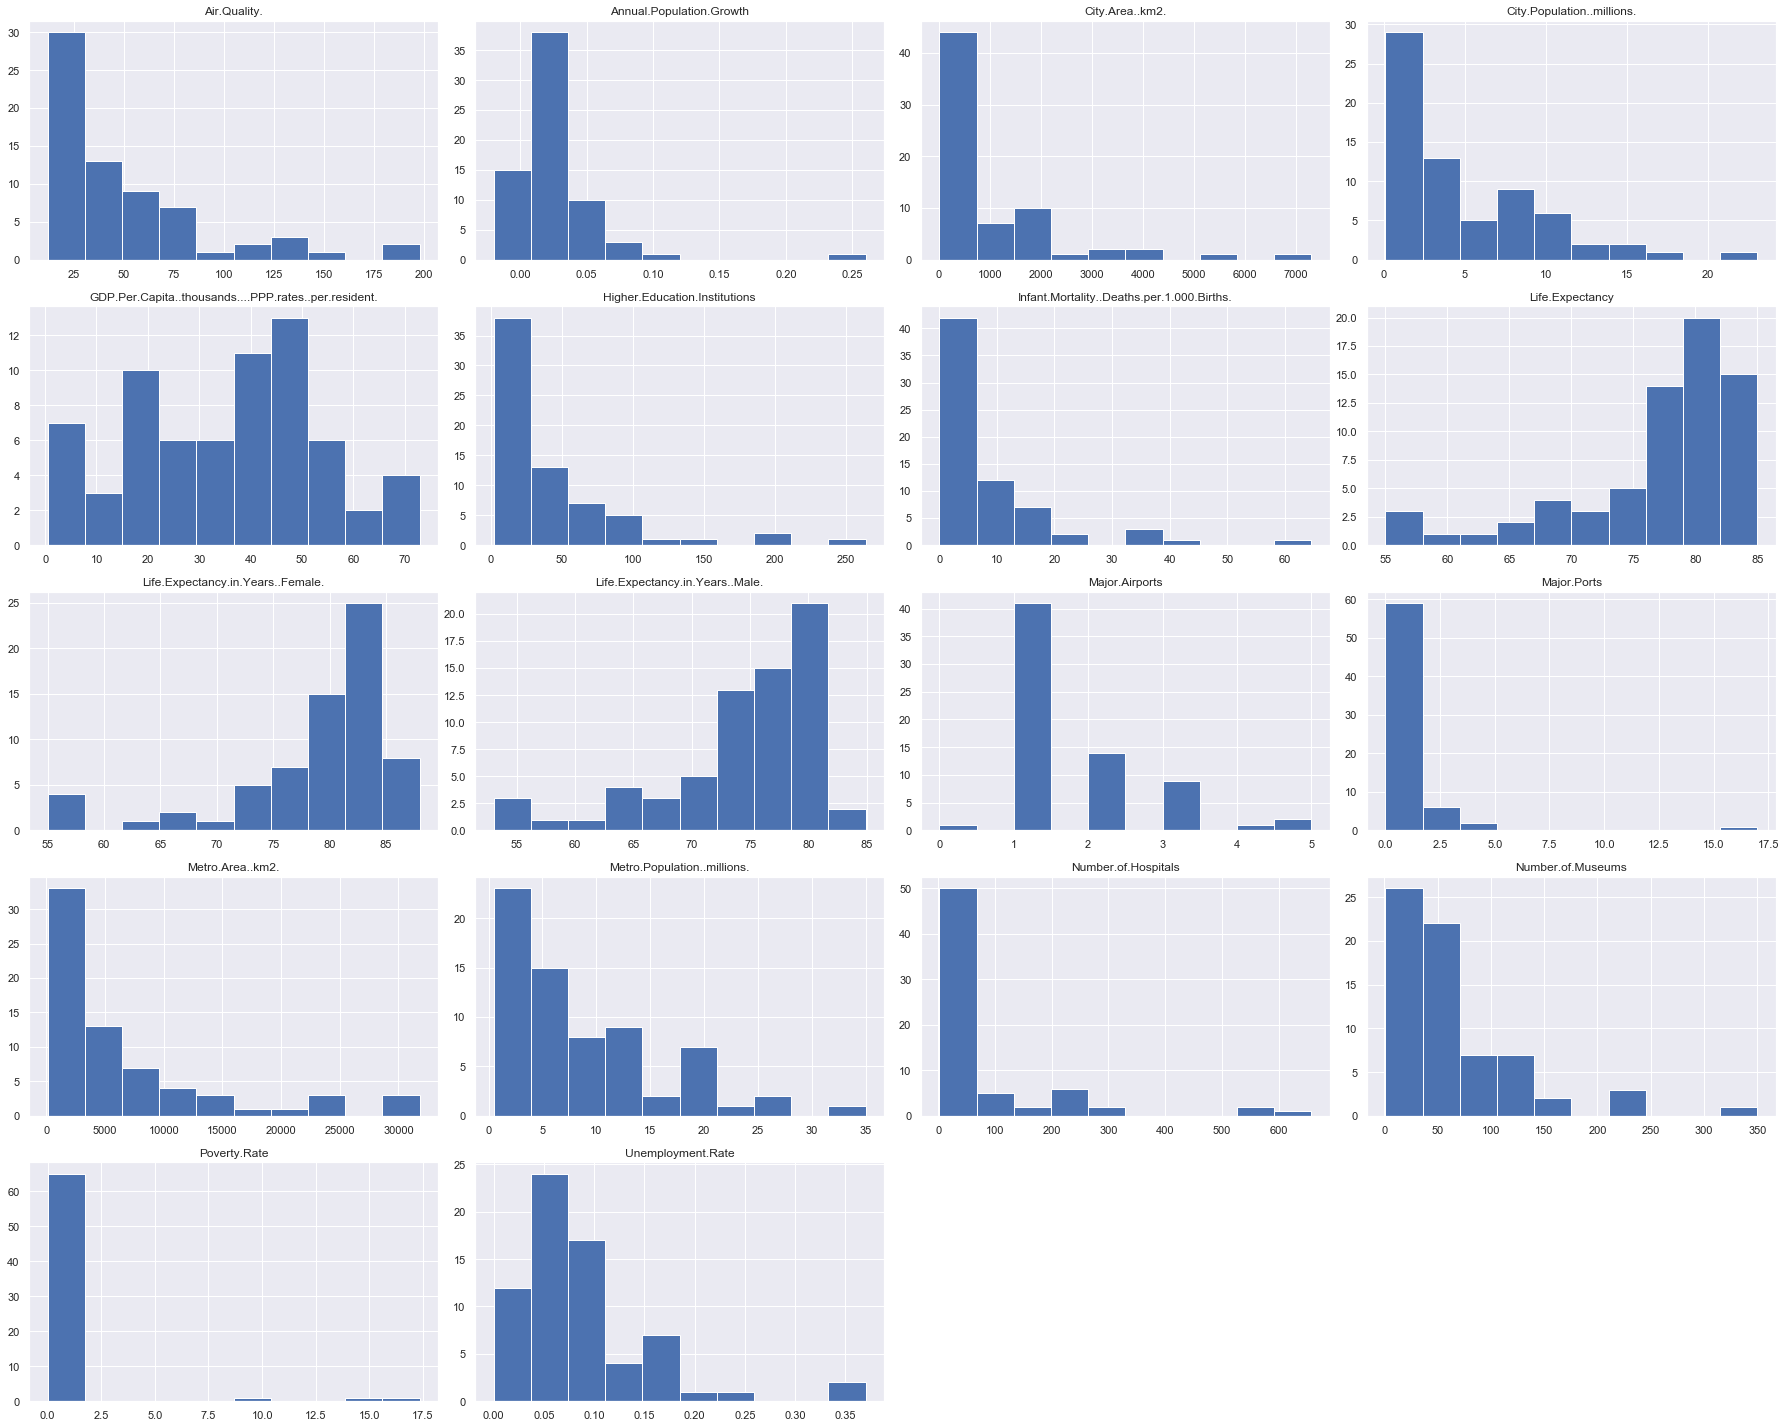

In [110]:
df.hist(figsize=(25,20))
plt.tight_layout()

 #### <a id='doca'>6.1.2 Distribution of city_area</a>

Below are the distribution and sorted scatter plot for city area with Hamburg and Geneva being the largest and smallest cities in the list, respectively. Hamburg and Shanghai are the potential outliers.

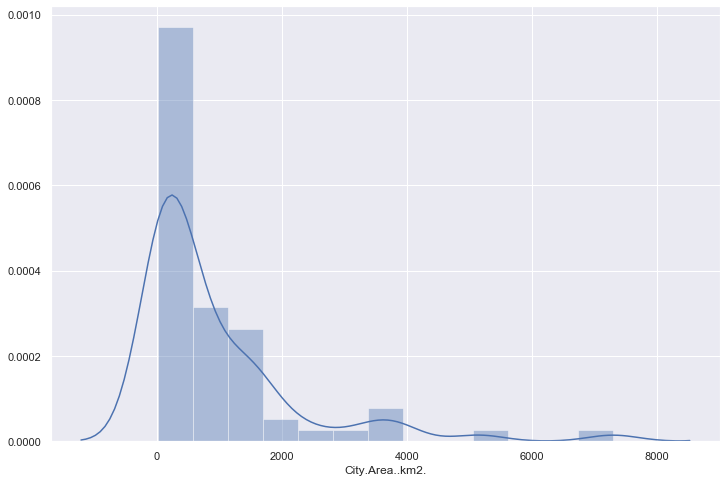

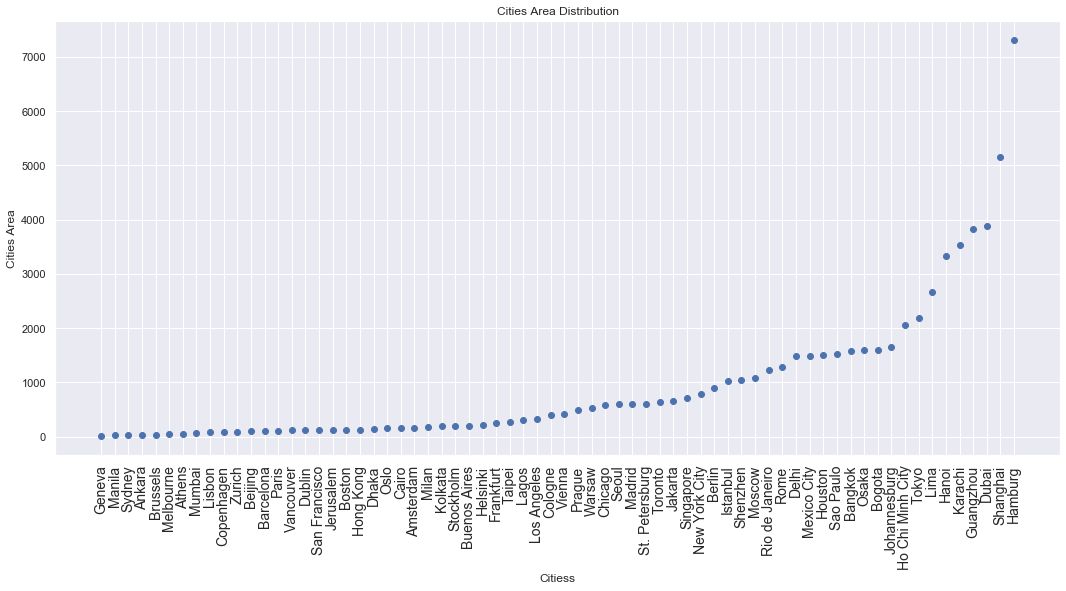

In [111]:
plt.figure(figsize = (12, 8))
sns.distplot(df['City.Area..km2.'])
plt.show() 
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['City.Area..km2.'])
plt.scatter(df["Geography"][g.index], g['City.Area..km2.'].values) 
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Citiess', fontsize=12)
plt.ylabel('Cities Area', fontsize=12)
plt.title("Cities Area Distribution")
plt.show()

#### <a id='doma'>6.1.3 Distribution of metro_area</a>

Below are the distribution and sorted scatter plot for Metro area with New York and Dublin being the largest and smallest in the list, respectively. New York city, Ho Chi Minh City and Berlin could be potential outliers. 

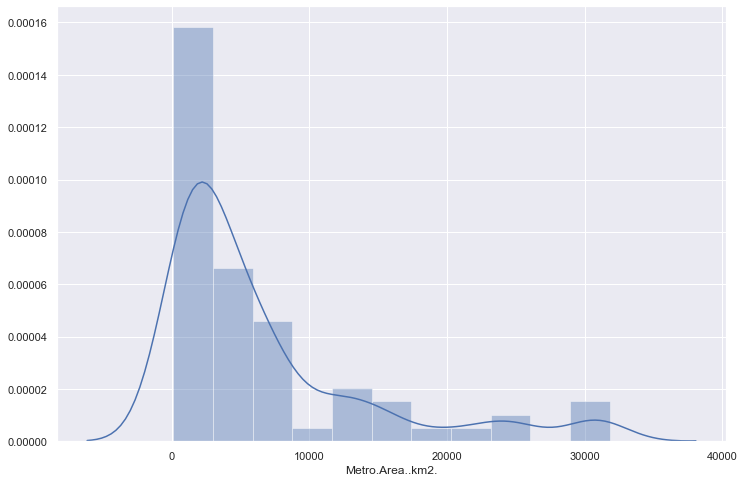

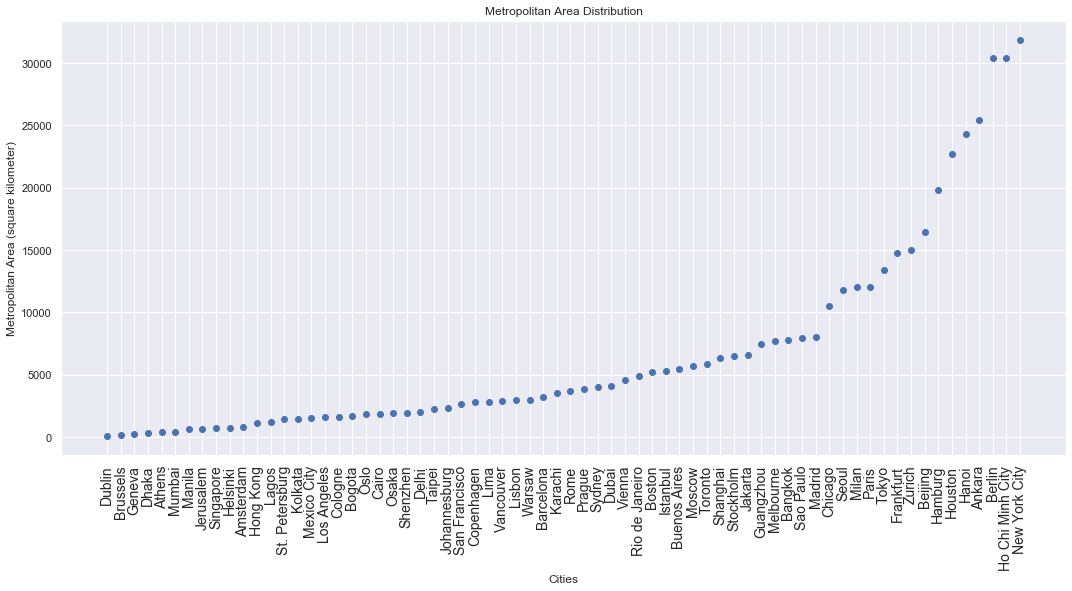

In [112]:
plt.figure(figsize = (12, 8))
sns.distplot(df['Metro.Area..km2.'])
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['Metro.Area..km2.'])
plt.scatter(df["Geography"][g.index], g['Metro.Area..km2.'].values) 
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Metropolitan Area (square kilometer)', fontsize=12)
plt.title("Metropolitan Area Distribution")
plt.show()

#### <a id='docp'>6.1.4 Distribution of city_population</a>

Below are the distribution and sorted scatter plots for city population with Shanghai and Melbourne as the most and least populated cities in the list, respectively. Shanghai is a potential outlier.

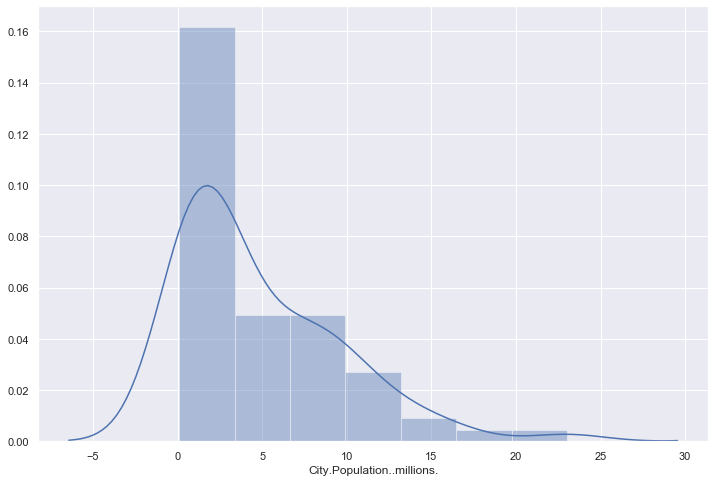

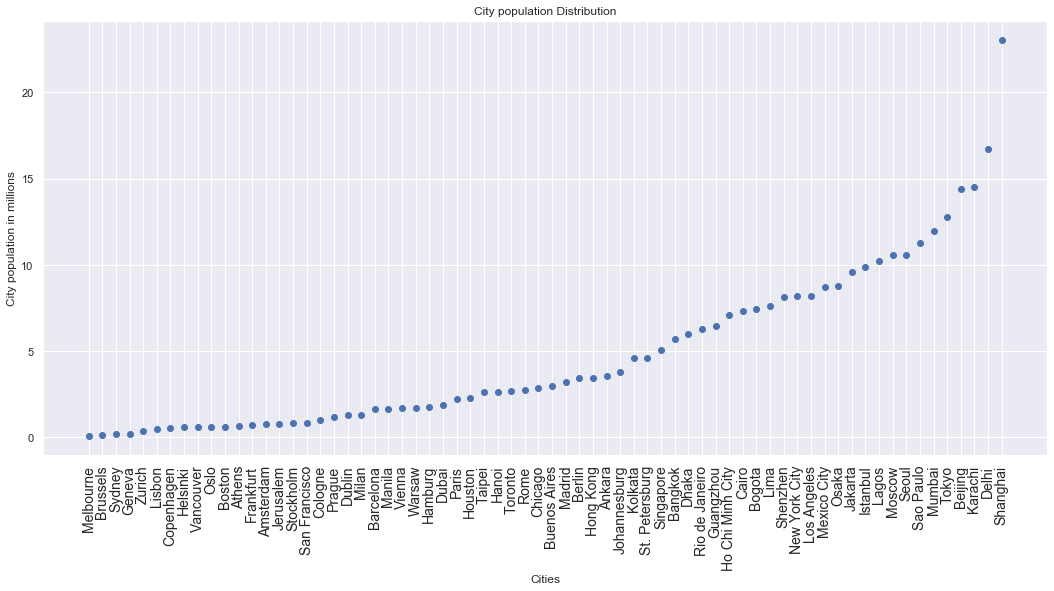

In [113]:
plt.figure(figsize = (12, 8))
sns.distplot(df['City.Population..millions.'])
plt.show() 
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['City.Population..millions.'])
plt.scatter(df["Geography"][g.index], g['City.Population..millions.'].values) 
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('City population in millions', fontsize=12)
plt.title("City population Distribution")
plt.show()

#### <a id='#domp'>6.1.5 Distribution of metro_population</a>

Below are the distribution and sorted scatter plots for Metro population with Tokyo and Geneva as the most and least populated in the list, respectively. Tokyo could be an outlier. 

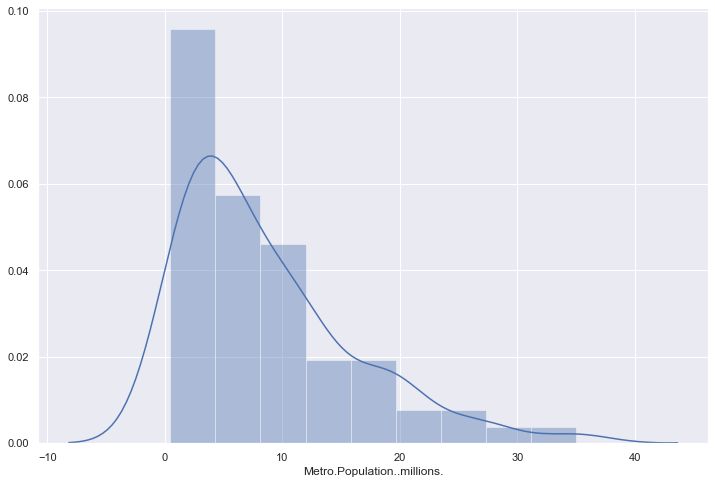

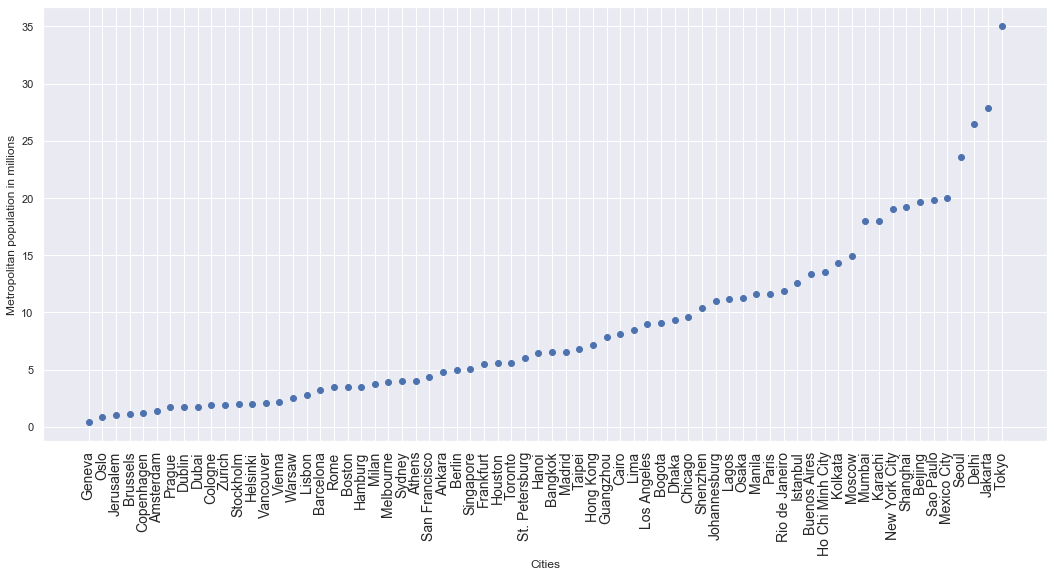

In [114]:
plt.figure(figsize = (12, 8))
sns.distplot(df['Metro.Population..millions.'])
plt.show() 
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['Metro.Population..millions.'])
plt.scatter(df["Geography"][g.index], g['Metro.Population..millions.'].values)
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Metropolitan population in millions', fontsize=12)
#plt.title("Metropolitan population Distribution")
plt.show()

#### <a id='dogdp'>6.1.6 Distribution of GDP</a>


Below is the sorted barplot for GDP with New York City and Dhaka having the highest and lowest GDPs in the list.

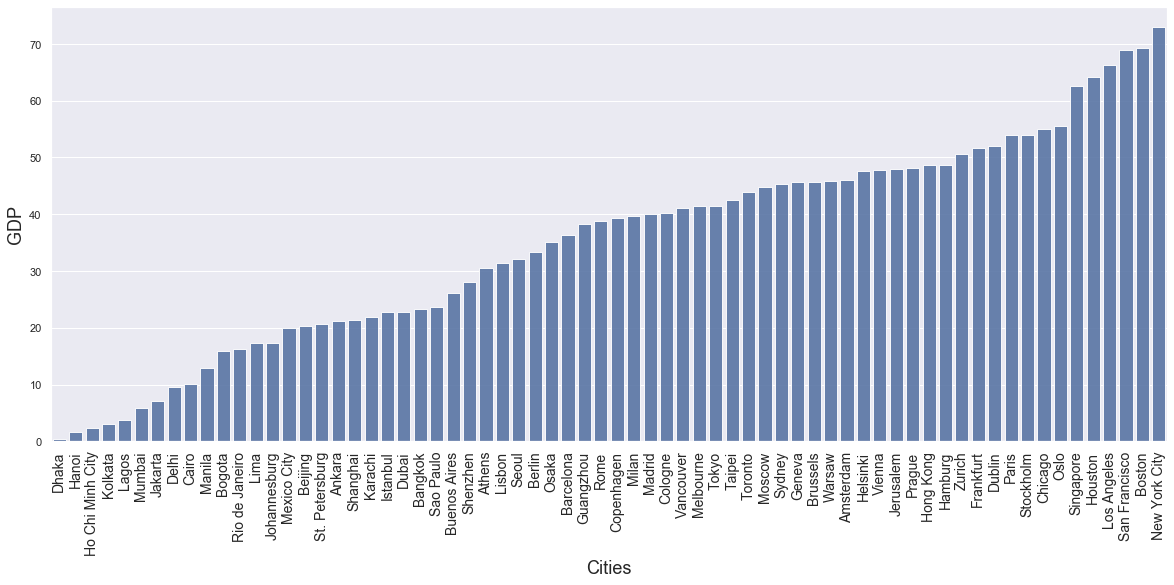

In [115]:
plt.figure(figsize=(20,8))
g = df.sort_values(by=['GDP.Per.Capita..thousands....PPP.rates..per.resident.'])
sns.barplot(g["Geography"][g.index].values, g['GDP.Per.Capita..thousands....PPP.rates..per.resident.'].values, alpha=0.9, color=color[0])
#sns.barplot(df["Geography"][GDP.index], GDP.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=18)
plt.ylabel('GDP', fontsize=18)
#plt.title("Top Cities with high GDP", fontsize=25)
plt.show()

#### <a id='dour'>6.1.7 Distribution of unemployment_rate</a>

Below is the sorted barplot for unemployment rate with Johannesburg and San Francisco having the highest and lowest rate in the list, respectively. The unemployment rate in San Francisco is zero! 

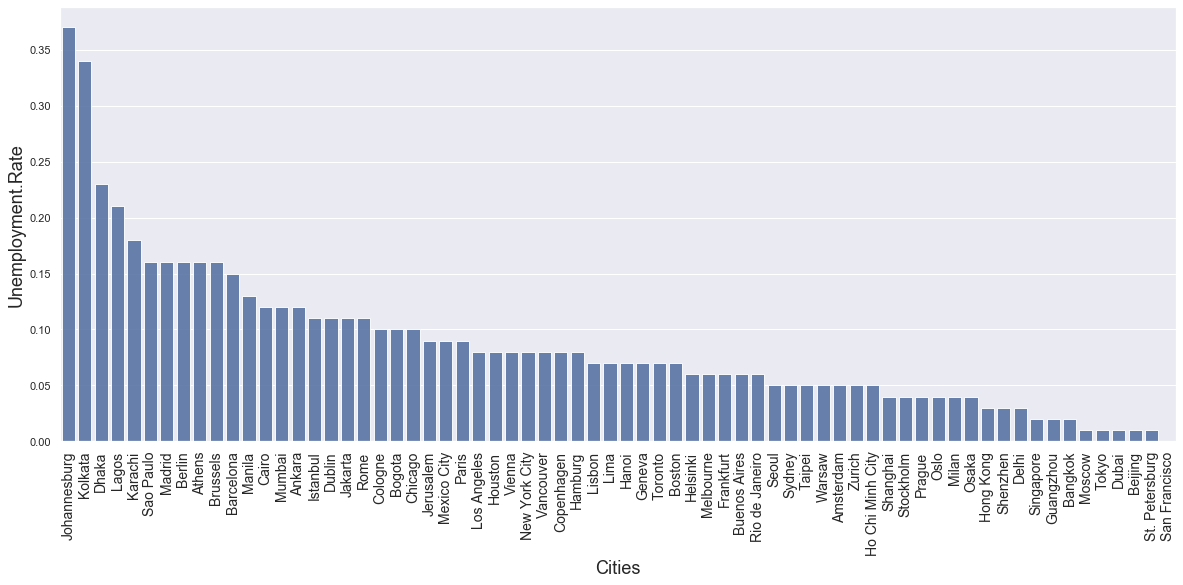

In [116]:
plt.figure(figsize=(20,8))
g = df.sort_values(by=['Unemployment.Rate'],ascending=False)
sns.barplot(g["Geography"][g.index].values, g['Unemployment.Rate'].values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=18)
plt.ylabel('Unemployment.Rate', fontsize=18)
#plt.title("low Unemployment.Rate", fontsize=25)
plt.show()

#### <a id='dopr'>6.1.8 Distribution of poverty_rate</a> 

This might be the most surprising feature in the dataset: Sydney and Oslo have extremely high poverty rate even though both cities have higher than average GDPs (average GDP is about 35) and lower than average unemployment rates (average unemployment rate is about 0.086). First one may hesitate the accuracy of the dataset, but a quick google search confirms the poverty rate for both cities. Then, a reasonable explanation would be majority of population in both cities are very low payed and the wealth distribution is not balanced! How could it be possible for a socialist country like Norway? [This article](https://www.tnp.no/norway/economy/poverty-income-inequality-increase-norway#targetText=Around%2017.5%20per%20cent%20of,percent%20of%20which%20are%20poor.) confirms low income and provides an explanation for that: "Around 17.5 per cent of all children in Oslo live in households that have low income, and people with immigrant background account for 43 per cent of all the poor."

On the other hand, it is interesting that although Beijing has a lower than average GDP, it has a very low poverty rate. This could be explained by the fact that Beijing also has a low unemployment rate. However, it is surprising that Lagos with high unemployment rate and very low GDP has zero poverty rate! This brings the question of how the poverty rate is measured in different countries. It could be that the level of GDP determines the level of poverty line, and therefore poverty rate is not an independent feature. If so, maybe comparing different cities for poverty rate is not really relevant. We can investigate this further with bivariate plots and correlation between GDP and poverty rate.    

Mumbai, Sydney and Oslo could be count as outliers. Sydney and Oslo with high GDP and low unemployment but high poverty rate could be considered as anomalies too as well as Lagos which has the opposite situation. 

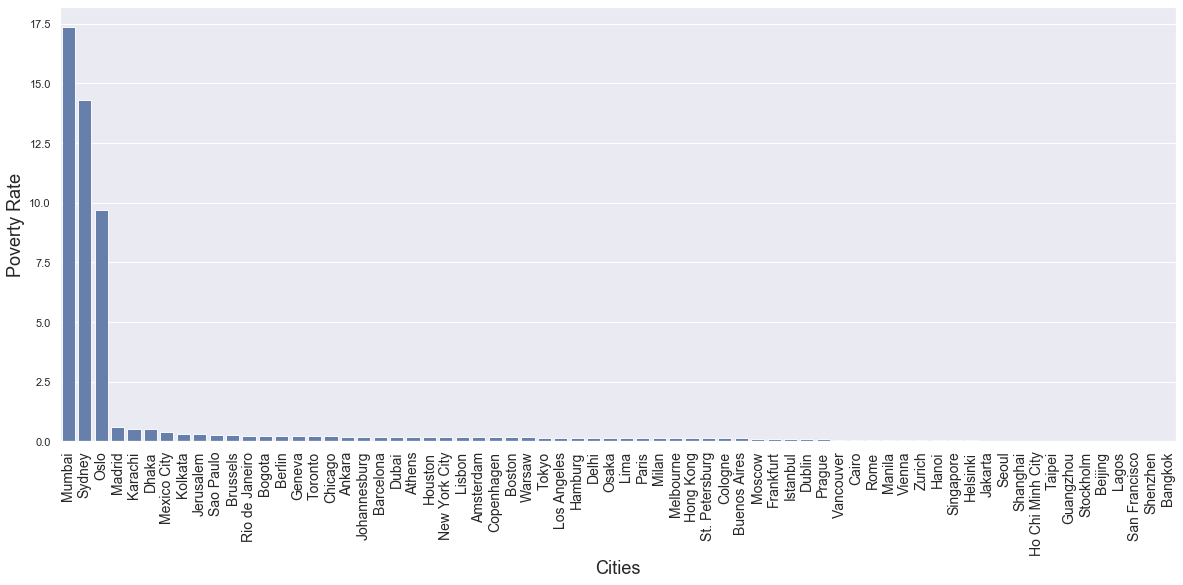

In [117]:
plt.figure(figsize=(20,8))
g = df.sort_values(by=['Poverty.Rate'],ascending=False)
sns.barplot(g["Geography"][g.index].values, g['Poverty.Rate'].values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=18)
plt.ylabel('Poverty Rate', fontsize=18)
#plt.title("Distribution of Poverty Rate", fontsize=25)
plt.show()

 #### <a id='dole'>6.1.9 Distribution of life_expectancy</a>


Below are the distribution and sorted scatter plot for life expectancy with Berlin and Lagos as the highest and lowest in the list, respectively. This confirms the expected possitive correlation between wealth and wellness. Lagos has a very low GDP!

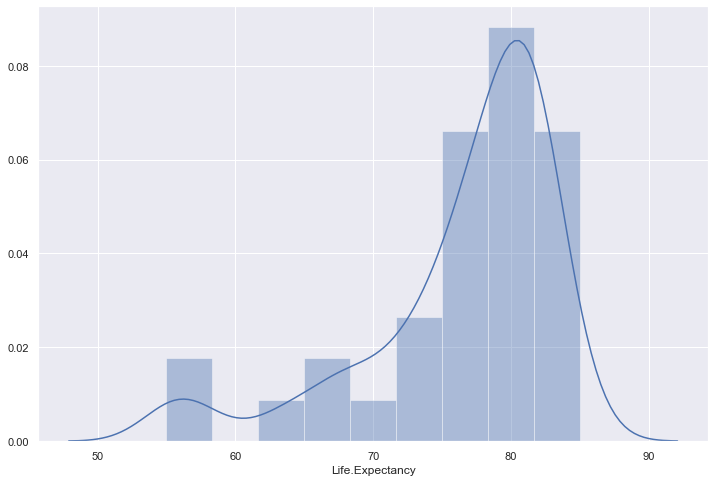

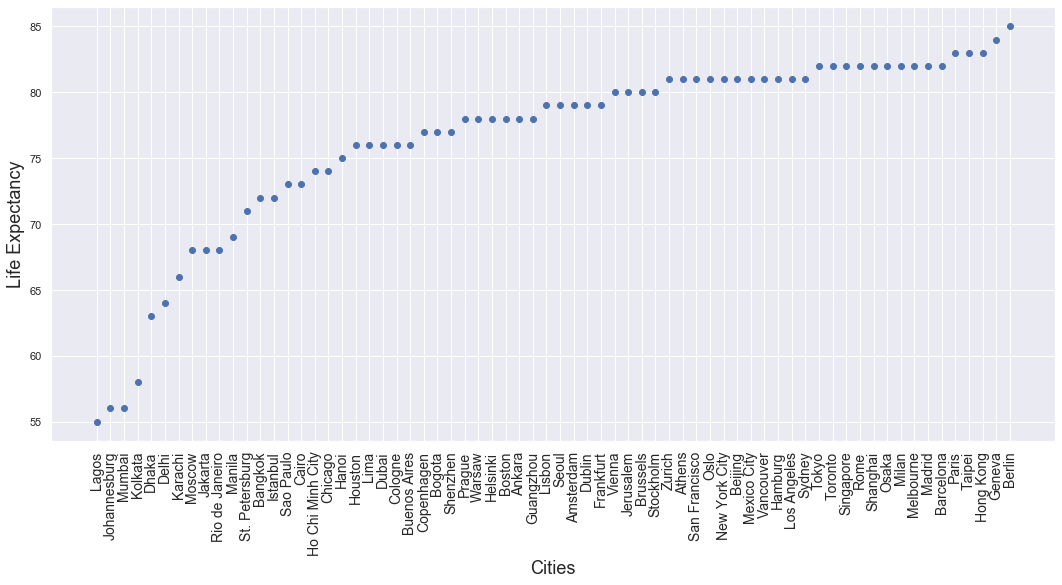

In [118]:
plt.figure(figsize = (12, 8))
sns.distplot(df['Life.Expectancy'])
plt.show() 
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['Life.Expectancy'])
plt.scatter(df["Geography"][g.index], g['Life.Expectancy'].values) 
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=18)
plt.ylabel('Life Expectancy', fontsize=18)
#plt.title("Top Cities with low Poverty Rate", fontsize=25)
plt.show()

 #### <a id='doaq'>6.1.10 Distribution of air quality index</a>

Below is the distribution and sorted scatter plot of air quality index for cities in the dataset. While for most cities the index is less than 100, there are a few with index higher than 125 and even as high as 200. Those could be potential outliers, e.g. Delhi, Karachi, Kolkata, Cairo, Dhaka which are the most polluted cities in the list.  

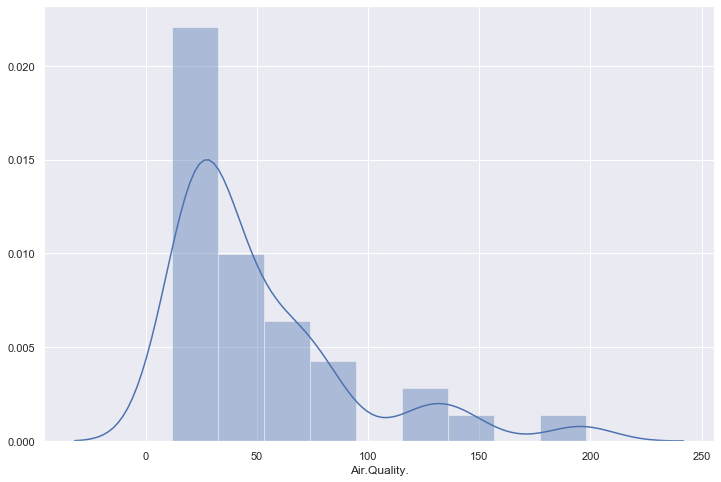

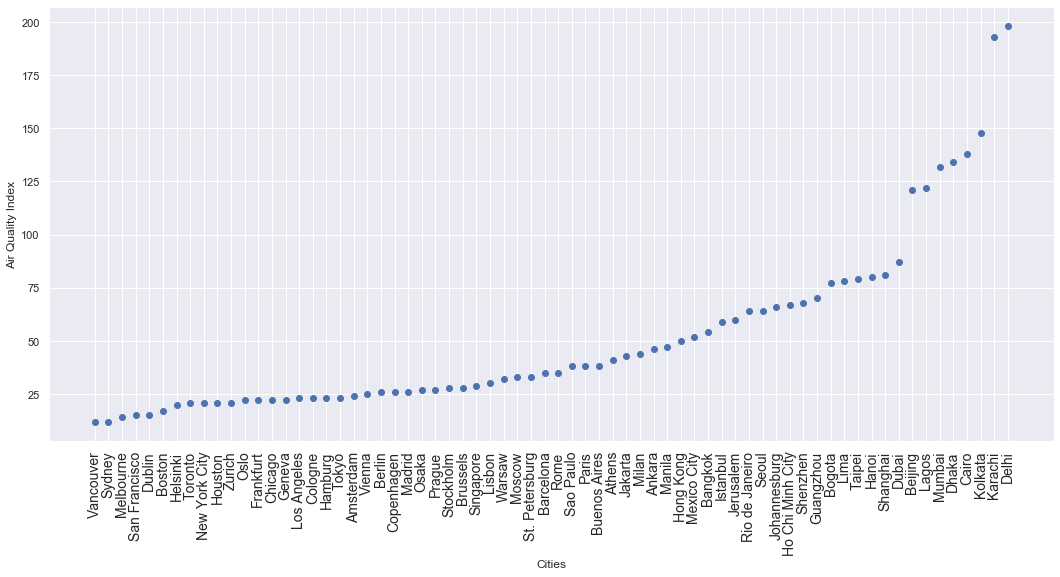

In [119]:
plt.figure(figsize = (12, 8))
sns.distplot(df['Air.Quality.'])
plt.figure(figsize = (18, 8))
g = df.sort_values(by=['Air.Quality.'])
plt.scatter(df["Geography"][g.index], g['Air.Quality.'].values) 
plt.xticks(rotation='vertical', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
#plt.title("Metropolitan Area Distribution")
plt.show()

### <a id='udcav'>6.2 Univariate Distribution of categorical variables <a>



#### <a id='dopi'>6.2.1 Distribution of primary_ind</a>

Below is the distribution of Primary industries with Manufacturing being the most common. 

Text(0.5, 1.0, 'Distribution of Primary Industries ')

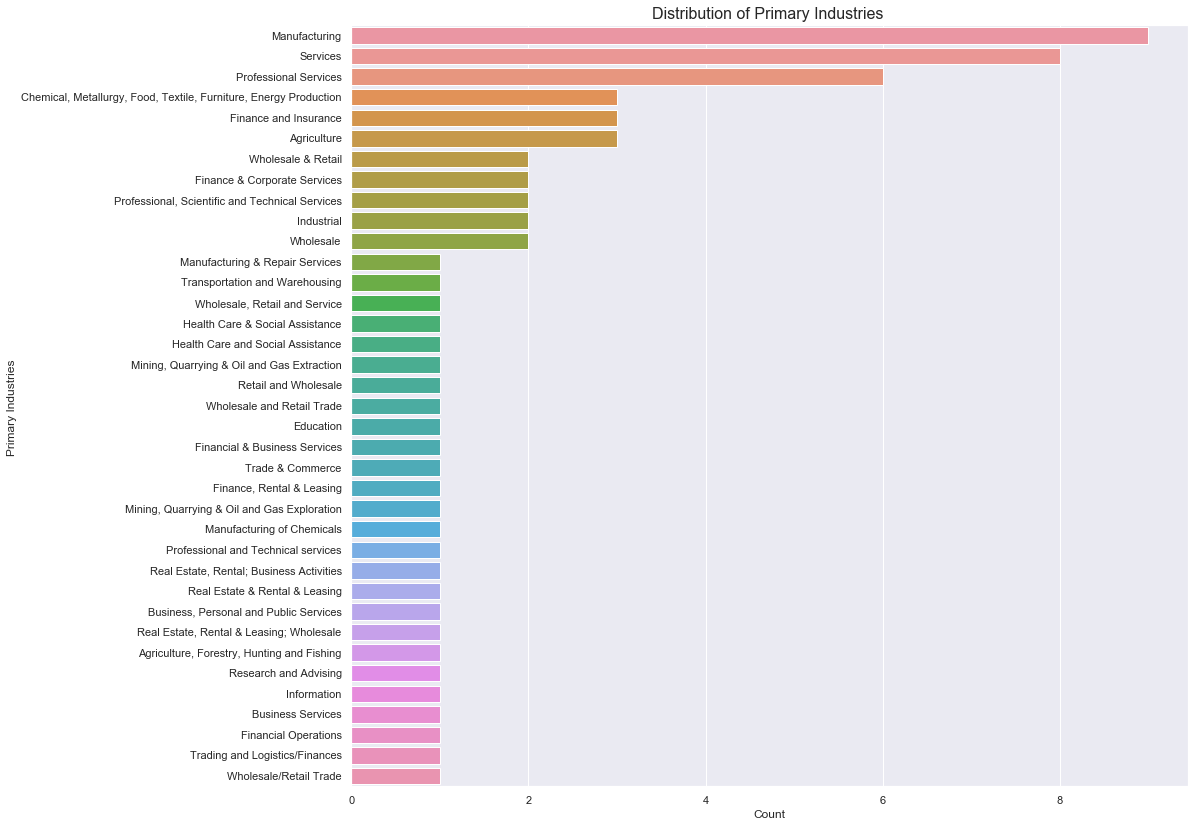

In [120]:
plt.figure(figsize=(15,14))
count = df['Primary.Industry'].value_counts()
sns.barplot(count.values, count.index, )
plt.xlabel('Count', fontsize=12)
plt.ylabel('Primary Industries ', fontsize=12)
plt.title("Distribution of Primary Industries ", fontsize=16)

List of cities with manufacturing as primary industry:

In [121]:
df[df['Primary.Industry']=='Manufacturing']["Geography"]

7     Bogota        
16    Dhaka         
21    Guangzhou     
34    Lagos         
39    Manila        
44    Mumbai        
49    Prague        
57    Singapore     
58    St. Petersburg
Name: Geography, dtype: object

#### <a id='dosi'>6.2.2 Distribution of secondry_ind</a>

Below is the distribution of Secondry industries with again Manufacturing being the most common.

Text(0.5, 1.0, 'Distribution of Secondary Industries')

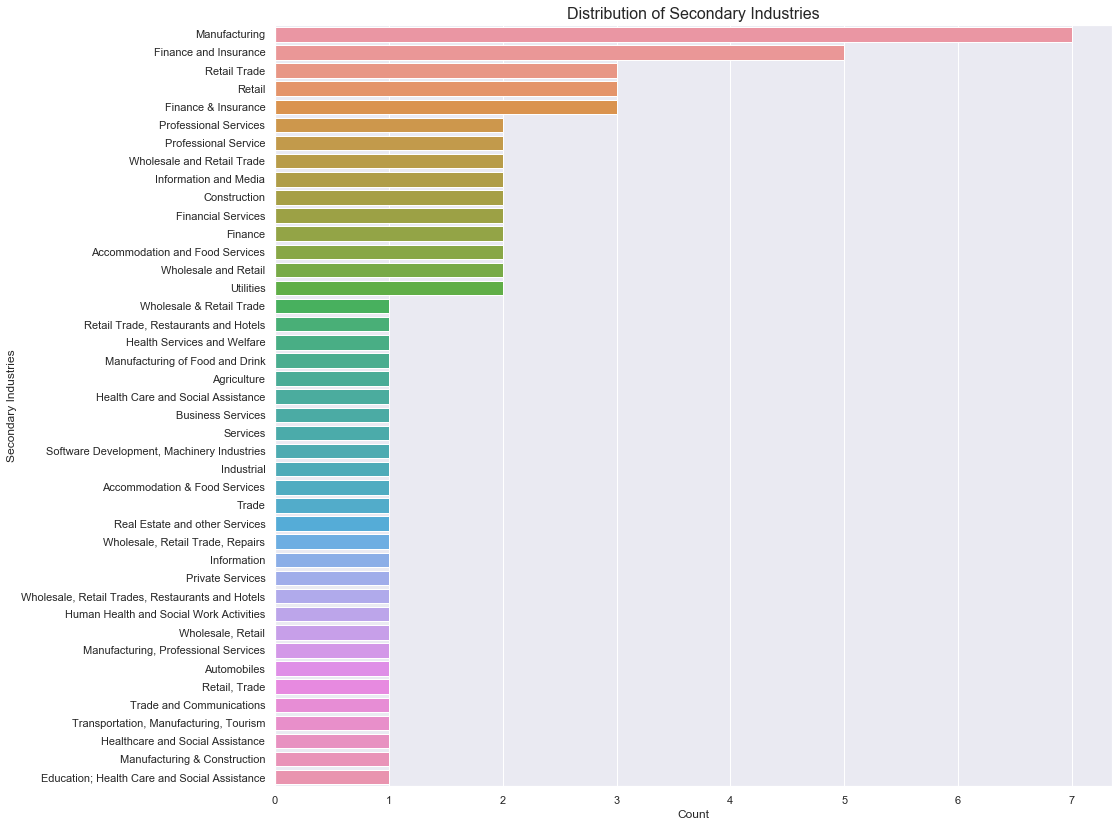

In [122]:
plt.figure(figsize=(15,14))
count = df['Secondary.Industry'].value_counts()
sns.barplot(count.values, count.index, )
plt.xlabel('Count', fontsize=12)
plt.ylabel('Secondary Industries', fontsize=12)
plt.title("Distribution of Secondary Industries", fontsize=16)

#### <a id='dopt'>6.2.3 Distribution of public_transportation</a>

Below is the distribution of public transportations, as expected the most common public transport in big cities is bus and rail.

Text(0.5, 1.0, 'Distribution of Public Transportation')

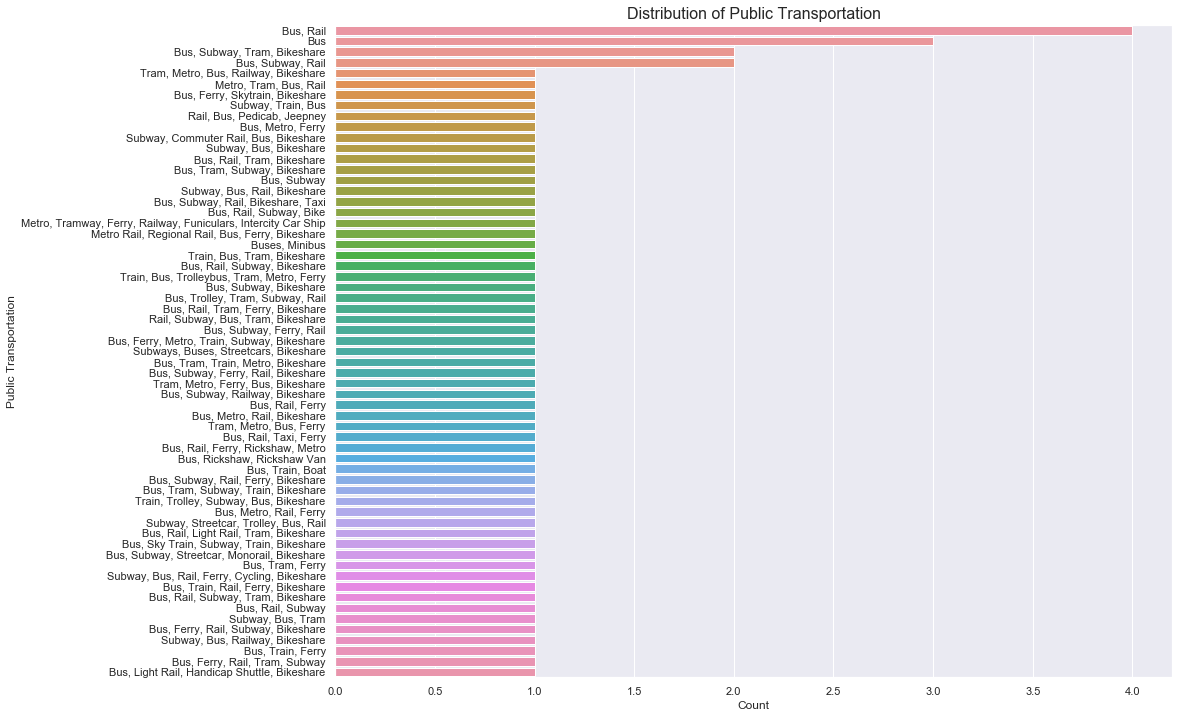

In [123]:
plt.figure(figsize=(15,12))
count = df['Public.Transportation'].value_counts()
sns.barplot(count.values, count.index, )
plt.xlabel('Count', fontsize=12)
plt.ylabel('Public Transportation', fontsize=12)
plt.title("Distribution of Public Transportation", fontsize=16)

#### <a id='dois'>6.2.4 Distribution of anti_smoking</a>

Text(0.5, 1.0, 'Distribution of Anti Smoking Legislation')

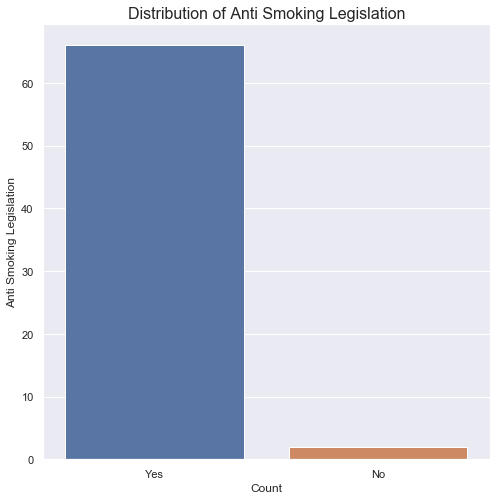

In [124]:
plt.figure(figsize=(8,8))
count = df['Anti.Smoking.Legislation'].value_counts()
sns.barplot(count.index, count.values, orient = "v" )
plt.xlabel('Count', fontsize=12)
plt.ylabel('Anti Smoking Legislation', fontsize=12)
plt.title("Distribution of Anti Smoking Legislation", fontsize=16)


Among 68 cities only two cities do not have anti smoking legislation: Dubai and Mumbai. Then we can ignore this column of dataset for future analysis. 

In [125]:
df[df['Anti.Smoking.Legislation']=='No']['Geography']



17    Dubai 
44    Mumbai
Name: Geography, dtype: object

#### <a id='doee'>6.2.5 Distribution of energy_efficiency</a>

In [126]:
EE_list = []
for x in df["Laws.or.Regulations.to.Improve.Energy.Efficiency"].values:
    if str(x) != "nan":
        EE_list.extend( [lst.strip() for lst in x.split(",")] )
temp_data = pd.Series(EE_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='energy efficiency regulation')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="energy efficiency regulation")

<Figure size 1080x576 with 0 Axes>

The following six cities do not have energy efficiency regulations. It could be expected in cities with low GDP such as Lagos, Mumbai and Manila as energy efficiency regulations requires some initial investment by the government/people. However, it was not expected in Taipei with more than average GDP or even Ankara!  

In [127]:
df[df['Laws.or.Regulations.to.Improve.Energy.Efficiency']=='No']['Geography']

1     Ankara 
32    Karachi
34    Lagos  
39    Manila 
44    Mumbai 
61    Taipei 
Name: Geography, dtype: object

####  <a href='dor'>6.2.6 Distribution of rating and gen_rating</a>

In [128]:
rating_list = []
for x in df["rating"].values:
    if str(x) != "nan":
        rating_list.extend( [lst.strip() for lst in x.split(",")] )
temp_data = pd.Series(rating_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='rating')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="rating")

<Figure size 1080x576 with 0 Axes>

In [129]:
gen_rating_list = []
for x in df["gen.rating"].values:
    if str(x) != "nan":
        gen_rating_list.extend( [lst.strip() for lst in x.split(",")] )
temp_data = pd.Series(gen_rating_list).value_counts()

labels = (np.array(temp_data.index))
sizes = (np.array((temp_data / temp_data.sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title='gen rating')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gen rating")

<Figure size 1080x576 with 0 Axes>

# <a id='q4'>7. Question 4 </a>

Now let’s look at the pairwise correlation between numerical features. We can use it for feature selection as well as detecting the strength of the negative or positive correlation between features. 

### <a id='pcbf'>7.1 pairwise correlation between features  </a> 

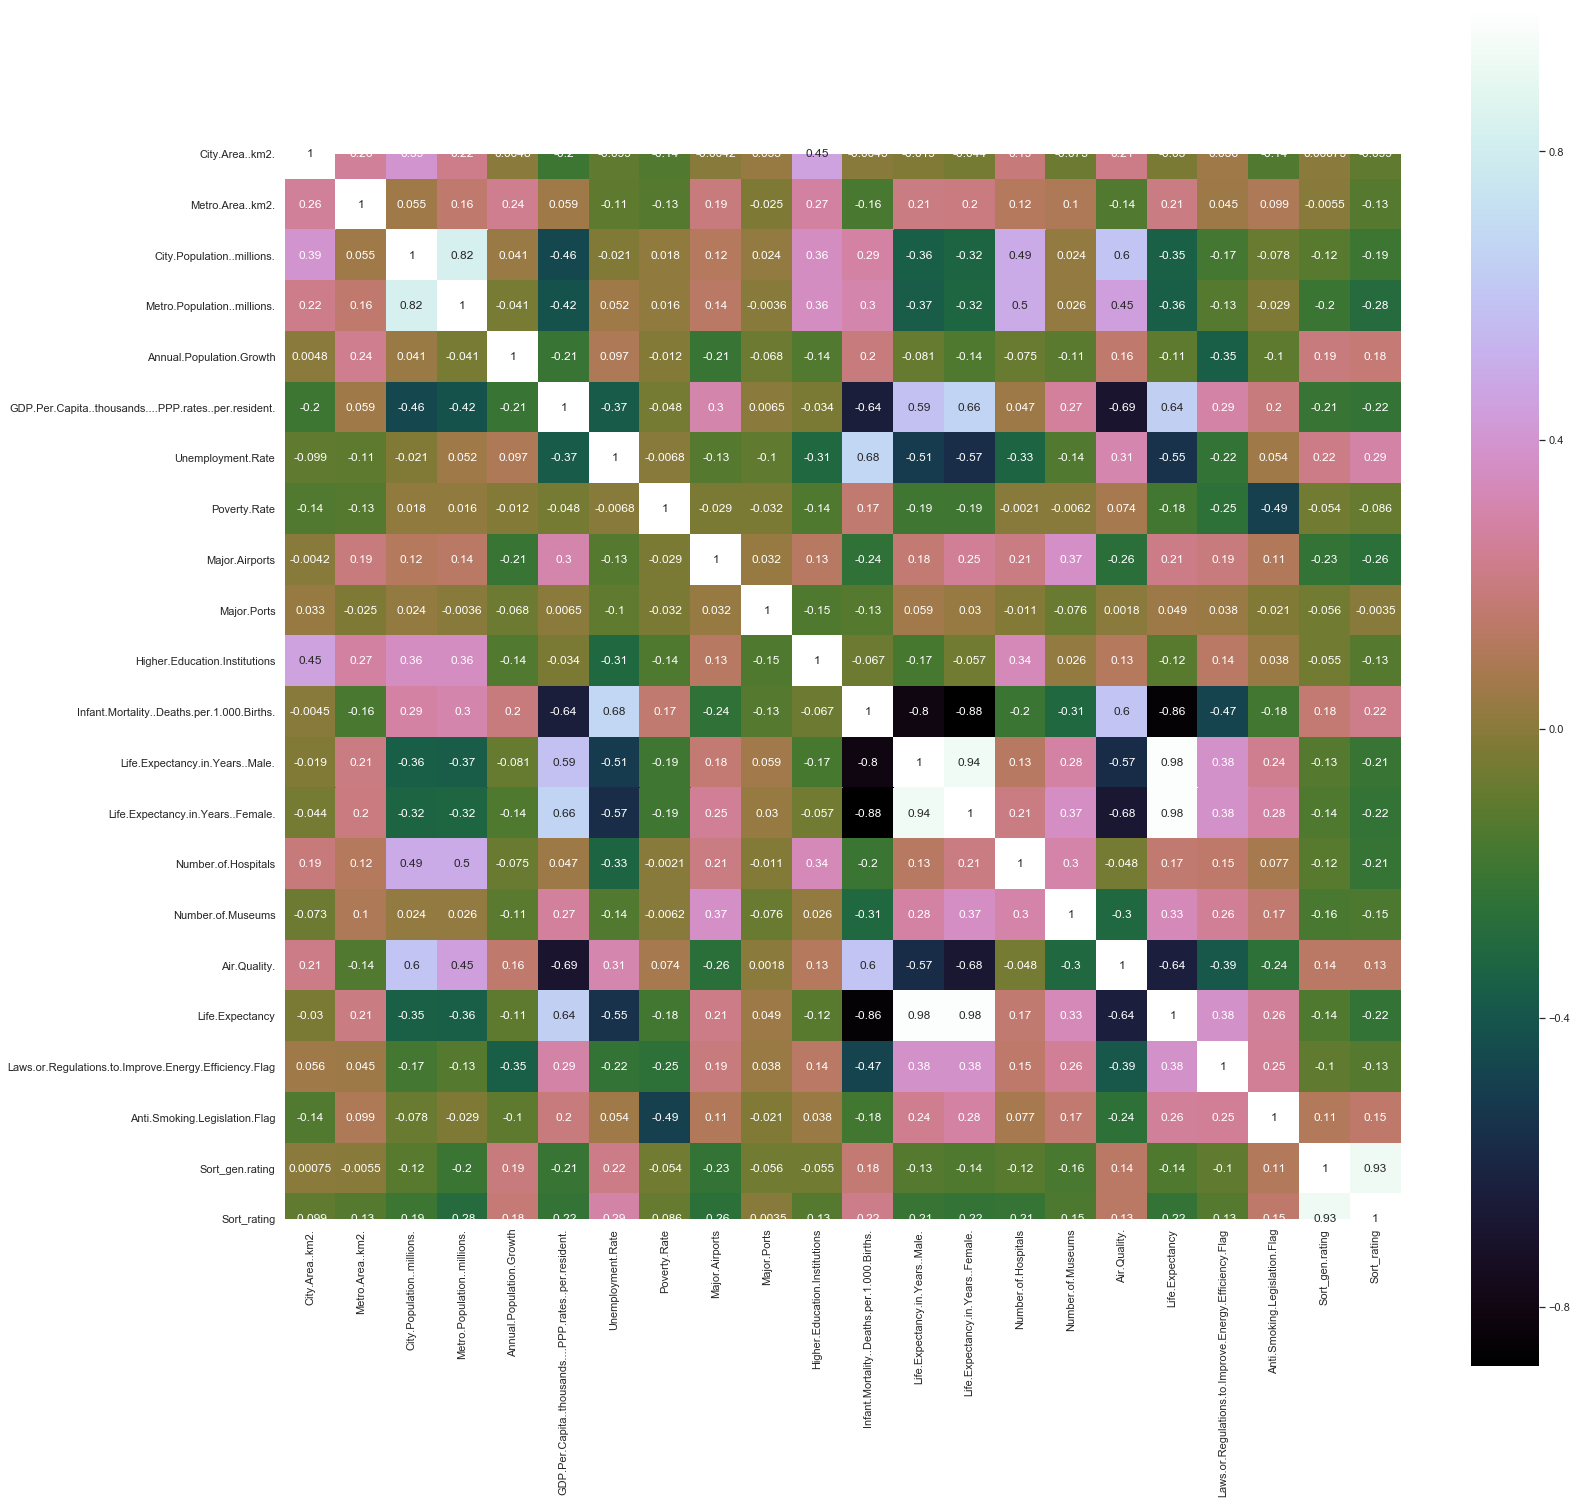

In [130]:
corr = rawdf.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap='cubehelix', square=True)

#plt.title('Correlation between numerical features')

In [131]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = num_features.columns[columns]
dfs = num_features[selected_columns]
dfs

,City.Area..km2.,Metro.Area..km2.,City.Population..millions.,Metro.Population..millions.,Annual.Population.Growth,GDP.Per.Capita..thousands....PPP.rates..per.resident.,Unemployment.Rate,Poverty.Rate,Major.Airports,Major.Ports,Higher.Education.Institutions,Infant.Mortality..Deaths.per.1.000.Births.,Life.Expectancy.in.Years..Male.,Number.of.Hospitals,Number.of.Museums,Air.Quality.,Laws.or.Regulations.to.Improve.Energy.Efficiency.Flag,Anti.Smoking.Legislation.Flag,Sort_gen.rating
0,165.00,807.00,0.76,1.40,0.01,46.0,0.05,0.18,1,1,23,4.12,76.30,7,68,24,1,1,1
1,30.72,25437.00,3.54,4.77,0.26,21.2,0.12,0.20,1,0,10,13.30,75.30,7,36,46,0,1,3
2,38.91,380.69,0.66,4.01,0.00,30.5,0.16,0.20,1,1,21,8.37,78.00,23,47,41,1,1,2
3,1569.00,7762.00,5.72,6.50,0.03,23.4,0.02,0.00,2,1,37,5.70,69.00,173,27,54,1,1,1
4,102.60,3236.00,1.62,3.23,0.01,36.3,0.15,0.20,1,1,8,9.40,79.00,45,69,35,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,641.00,5903.00,2.68,5.62,0.12,43.9,0.07,0.21,1,1,8,5.90,79.60,20,125,21,1,1,1
64,114.00,2877.00,0.60,2.10,0.01,41.1,0.08,0.08,1,1,11,4.00,79.00,9,49,12,1,1,2
65,415.00,4611.78,1.68,2.18,0.00,47.8,0.08,0.06,1,1,15,3.70,77.00,41,104,25,1,1,1
66,517.90,3000.00,1.69,2.50,0.04,45.9,0.05,0.17,1,0,88,4.90,74.10,34,56,32,1,1,1


Out of 22 numerical features in original dataset, three have high correlation (>=0.9). We can keep one of two and drop the other. We can 19 features. 

### <a id='lr'>7.2 Linear regression with marginal distributions for continous variables  </a>





In this section we are looking at pairwise plots for the following selected features:

* Poverty.Rate Vs GDP
* Infant.Mortality Vs GDP
* Air quality Vs GDP
* Metro.Population Vs City.Population
* Unemployment.Rate Vs Infant.Mortality
* Life.Expectancy Vs GDP 


In [132]:
### code to subplot the joint distributions 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

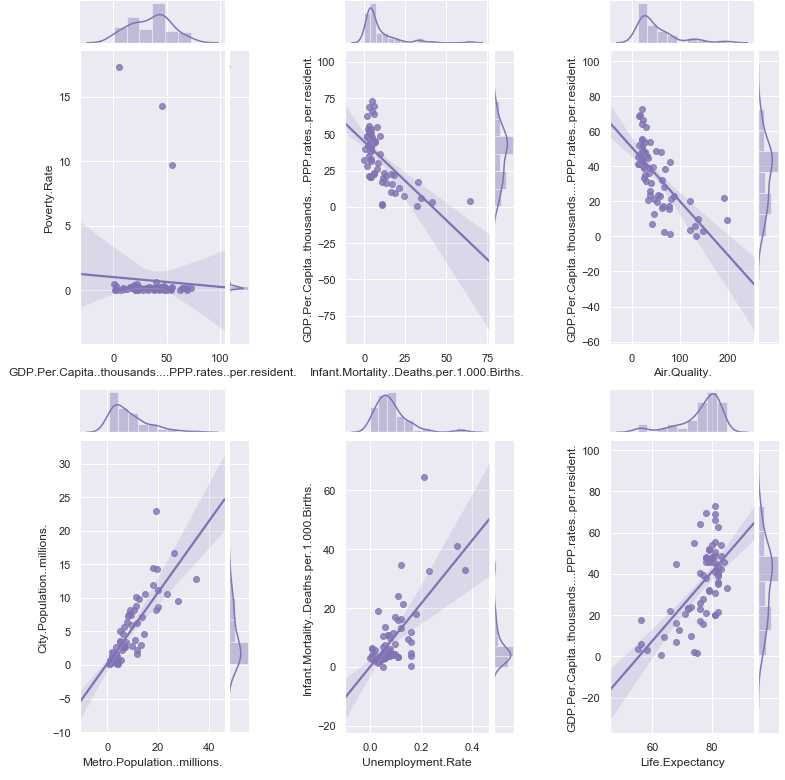

In [133]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()


sns.set(style="darkgrid")
x_IM = df["Infant.Mortality..Deaths.per.1.000.Births."]
x_LE = df["Life.Expectancy"]
x_GDP = df["GDP.Per.Capita..thousands....PPP.rates..per.resident."]
x_Aq = df["Air.Quality."]
x_ur = df["Unemployment.Rate"]
x_cp = df["City.Population..millions."]
x_mp = df["Metro.Population..millions."]
x_PR = df['Poverty.Rate']


g0 = sns.jointplot(x_GDP, x_PR, kind="reg", height=7, color="m")
g1 = sns.jointplot(x_IM, x_GDP, kind="reg", height=7, color="m")
g2 = sns.jointplot(x_Aq, x_GDP, kind="reg", height=7, color="m")
g4 = sns.jointplot(x_mp, x_cp, kind="reg", height=7, color="m")
g5 = sns.jointplot(x_ur, x_IM, kind="reg", height=7, color="m")
g6 = sns.jointplot(x_LE, x_GDP, kind="reg", height=7, color="m")



fig = plt.figure(figsize=(11,11))
gs = gridspec.GridSpec(2, 3)

mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg4 = SeabornFig2Grid(g4, fig, gs[3])
mg5 = SeabornFig2Grid(g5, fig, gs[4])
mg6 = SeabornFig2Grid(g6, fig, gs[5])

gs.tight_layout(fig)
plt.show()





Linear regression line of poverty rate vs GDP shows that poverty rate decrease as GDP increases. The three cities (Mumbai, Oslo and Sydney) that we mentioned in the univariate section are now manifestly the outliers. 

Infant mortality and GDP are also linearly dependent with negative correlation while unemployment and infant mortality are linearly dependent with positive correlation. We can also spot outliers.

One should be careful when interpreting the plot for air quality and GDP; Keep in mind lower air quality index implies less air pollution and vise versa. Therefore it is expected that as GDP increases, air quality index decreases which is also in line with the positive linear correlation between GDP and life expectancy.  

### <a id='sm'>7.4 Scatterplot Matrix  </a>




/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars



<Figure size 792x792 with 0 Axes>

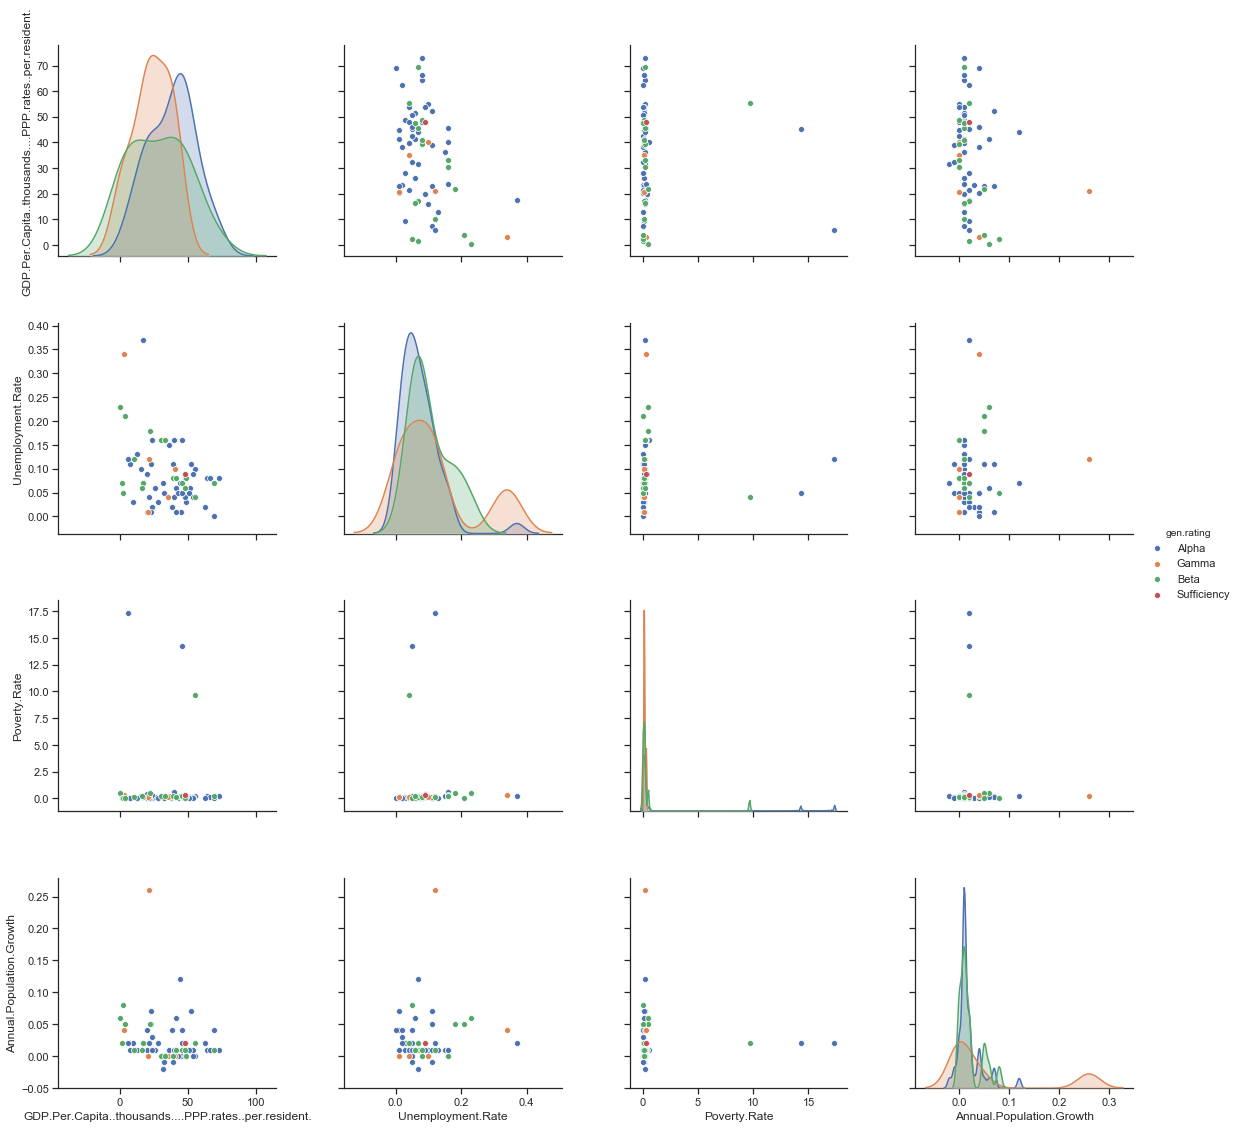

In [134]:
X = df[["gen.rating","GDP.Per.Capita..thousands....PPP.rates..per.resident.","Unemployment.Rate","Poverty.Rate","Annual.Population.Growth"]]
fig = plt.figure(figsize=(11,11))
sns.set(style="ticks")
sns.pairplot(X, hue="gen.rating",height=4)

# <a id='q5'>8. Question 5 </a>


### <a id='dwtd'>8.1 Do you trust the dataset, or not? Support your answer.  </a>
 

Yes, we investigated selected features and their correlations and it was in line with our expectation. Among inspected features the only surprising or suspicious entries was poverty rate; however, our search confirm the accuracy of them as we explained in previous sections.   

### <a id='tie'>8.2 Flag potential invalid entries, anomalous observations, or outliers. How should these entries be treated? </a>

In previous section when investigating univariate or pairwise distributions we mentioned some potential outliers. We can also detect the outliers using boxplot and whenever we see outliers and we want to specify exactly which cities they are, we can just use the sorted barplot or scatterplot that we used in univariate analysis to figure it out. In the following we can detect outliers for all numerical features.

In [135]:
col2 = [col for col in num_features if (max(num_features[col]) > 50 and max(num_features[col]) <=200) ]

In [136]:
col1 = [col for col in num_features if max(num_features[col]) <= 10]
col2 = [col for col in num_features if (max(num_features[col]) > 10 and max(num_features[col]) <=50) ]
col3 = [col for col in num_features if (max(num_features[col]) > 50 and max(num_features[col]) <=200) ]
col4 = [col for col in num_features if max(num_features[col]) > 200 ]
df1 = num_features[col1]
df2 = num_features[col2]
df3 = num_features[col3]
df4 = num_features[col3]
df1.shape[1], df2.shape[1], df3.shape[1],  df4.shape[1]

(6, 5, 6, 6)

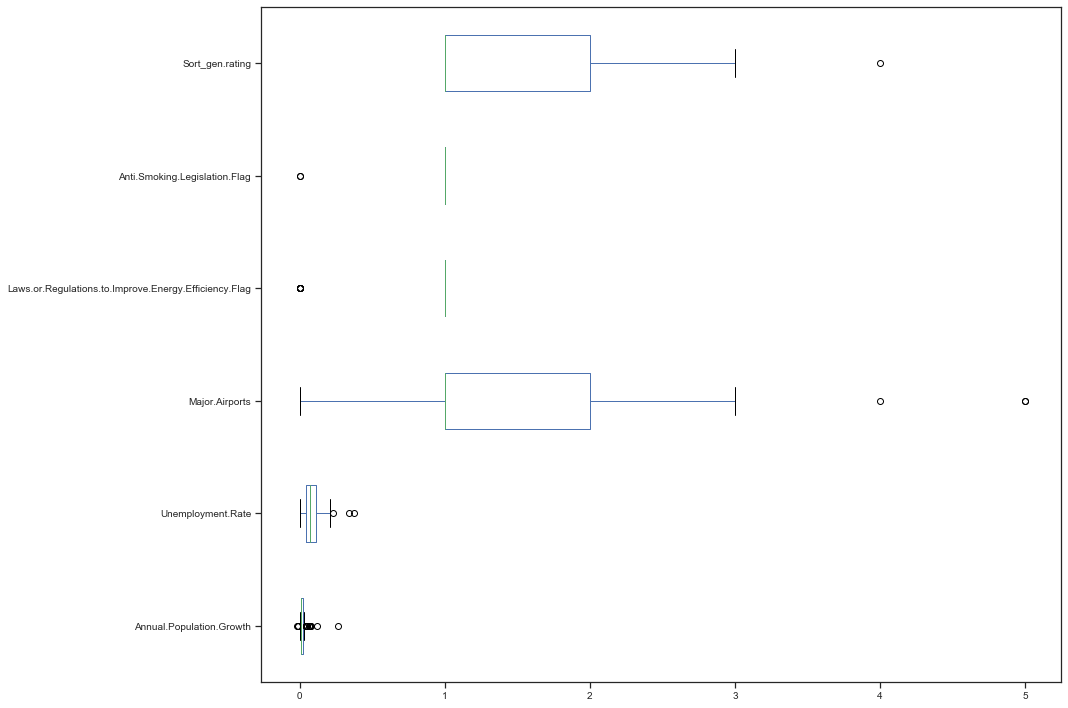

In [137]:
df1.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()

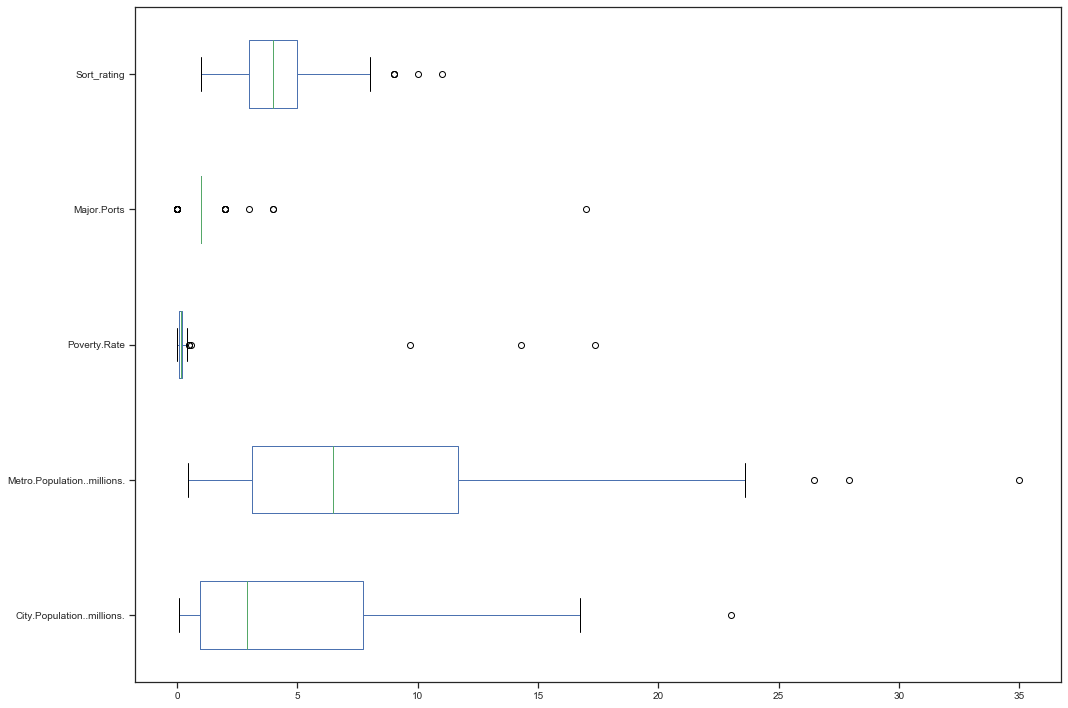

In [138]:
df2.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()

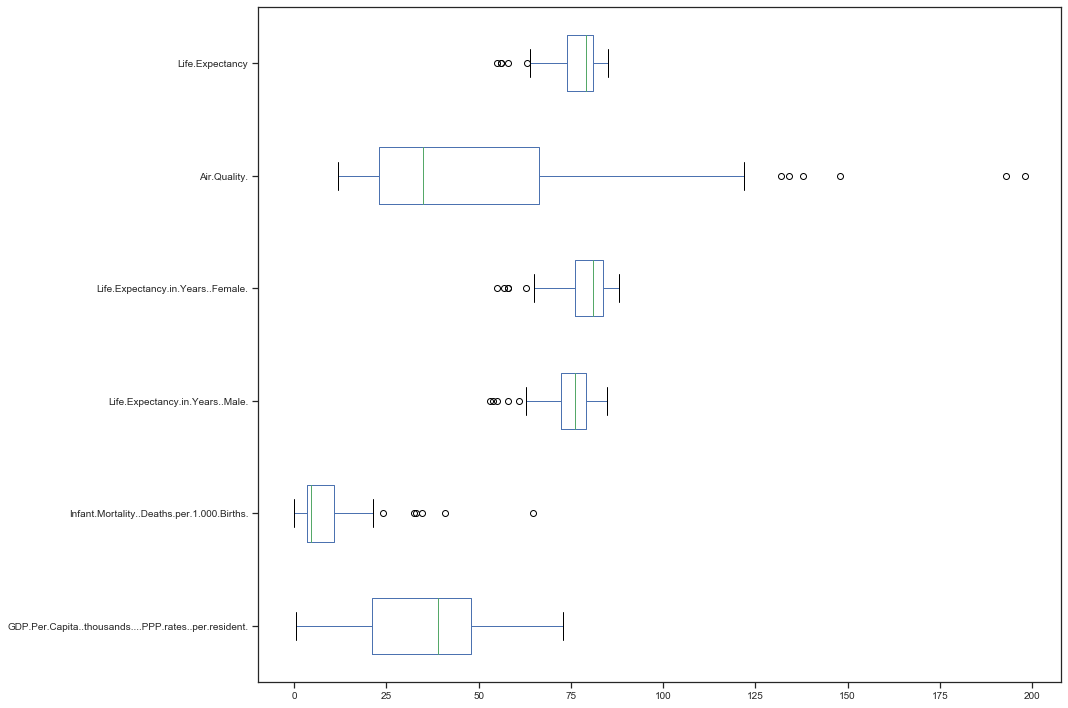

In [139]:
df3.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()

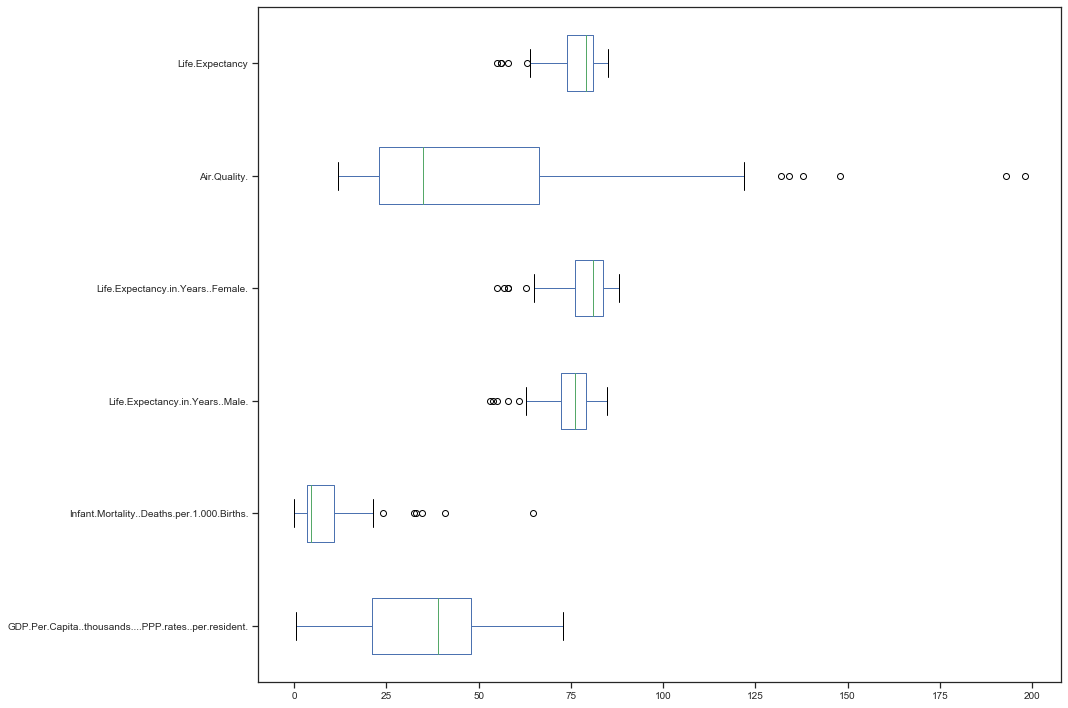

In [140]:
df4.boxplot(figsize=(15,10),grid=False, vert=False, fontsize=10)
plt.tight_layout()

# <a id='q6'>9. Question 6 </a>

### <a id='sosvt'>9.1 Does any of your analysis suggest that some of the variables should be transformed </a>

For the selected features we didn't need transformation, though we did not analyzed all features. 

In [143]:
!jupyter nbconvert  Project3_data_1.ipynb --to html

[NbConvertApp] Converting notebook Project3_data_1.ipynb to html
[NbConvertApp] Writing 2984670 bytes to Project3_data_1.html
